In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
df = pd.read_csv('/datasets/games.csv')

pd.set_option('max_columns', None)

## Предобработка данных

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


###  изменение названия столбцов

In [4]:
df.columns = [x.lower() for x in df.columns]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Работа с пропусками

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df['name'].isna().sum()

2

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df['name'].dropna(inplace=True)

In [9]:
df['name'].isna().sum()

0

In [10]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df['year_of_release'].fillna(-1, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int64')

df['critic_score'].fillna(-1, inplace=True)
df['critic_score'] = df['critic_score'].astype('float')

df.loc[df['user_score']=='tbd', 'user_score'] = -2
df['user_score'].fillna(-1, inplace=True)
df['user_score'] = df['user_score'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df['rating'].fillna('n/a', inplace=True)
df.loc[df['rating'] == 'n/a', ('na_sales', 'jp_sales', 'other_sales', 'eu_sales')].agg('sum')





na_sales       1242.46
jp_sales        841.96
other_sales     151.08
eu_sales        613.83
dtype: float64

In [13]:
df.loc[df['rating'] != 'n/a', ('na_sales', 'jp_sales', 'other_sales', 'eu_sales')].agg('sum')

na_sales       3159.89
jp_sales        455.41
other_sales     640.24
eu_sales       1810.84
dtype: float64

Тип данных year_of_release был изменен на целоцисленное для удобства операций с годами, Перевод в DataTime не требуется т.к. используется только год.  Пропущенные значения на данном этапе заменены маркером "-1"

Тип данных user_score был object, что неудобно для расчетов. Для изменения типа данных потребовалось использовать маркер для отсутствующих значений "-1", а так же другой маркер для значений "tbd" - "-2". 

Заменять средним или медианой не целесообразно т.к. пропусков довольно много и замена сильно скажется на характер распределения данных.

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,n/a
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,n/a


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df[df['user_score']== -2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,-2.0,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-2.0,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,-2.0,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-2.0,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1,Adventure,2.15,0.18,0.0,0.07,73.0,-2.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,-2.0,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,-2.0,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,-2.0,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,-2.0,E


Изучение природы пропусков по рейтингу от организации ESRB
Распределение пропущенных значений rating по регионам.

In [17]:
df.loc[df['rating'].isnull(), ('na_sales', 'eu_sales', 'jp_sales', 'other_sales')].sum()

na_sales       0.0
eu_sales       0.0
jp_sales       0.0
other_sales    0.0
dtype: float64

In [18]:
df.loc[df['rating'].isnull(), 'critic_score' ].value_counts()

Series([], Name: critic_score, dtype: int64)

In [19]:
df.loc[df['rating'].isnull(), 'user_score' ].value_counts()

Series([], Name: user_score, dtype: int64)

В подавляющем большинстве случаев, если есть пропуск по рейтингу от организации ESRB, то так же пропущены данные по оценке критиков и пользователей.

### Добавление суммы продаж во всех регионах

In [20]:
df['sum_sales'] = df['na_sales'] +  df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,n/a,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,n/a,31.38


## Исследовательский анализ данных

In [22]:
df['year_of_release'].value_counts()

 2008    1427
 2009    1426
 2010    1255
 2007    1197
 2011    1136
 2006    1006
 2005     939
 2002     829
 2003     775
 2004     762
 2012     653
 2015     606
 2014     581
 2013     544
 2016     502
 2001     482
 1998     379
 2000     350
 1999     338
 1997     289
-1        269
 1996     263
 1995     219
 1994     121
 1993      62
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1983      17
 1989      17
 1987      16
 1990      16
 1988      15
 1984      14
 1985      14
 1980       9
Name: year_of_release, dtype: int64

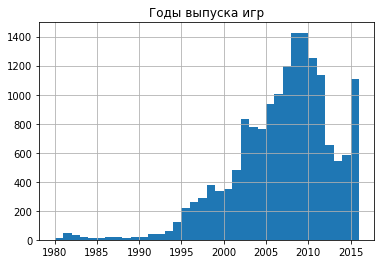

In [23]:
plt.title('Годы выпуска игр')
df['year_of_release'].hist(bins = 36, range = (1980, 2016))

наибольшее кол-во вупускаемых игр было в 2007-2010 годах.

In [24]:
top_platform = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).reset_index()
top_platform

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


## Выбор топ платформ и изучение актуального периода.

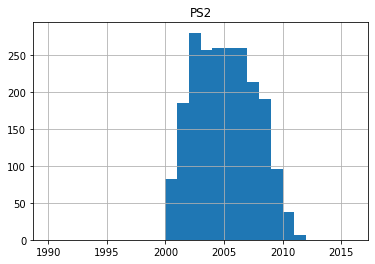

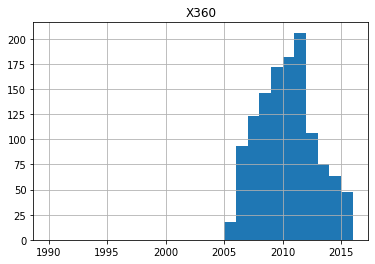

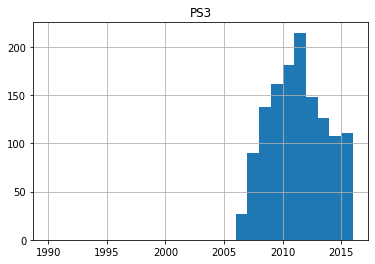

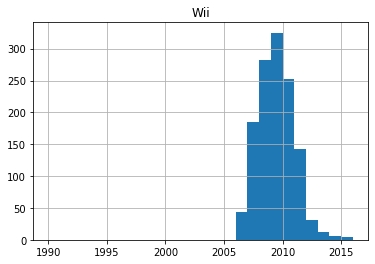

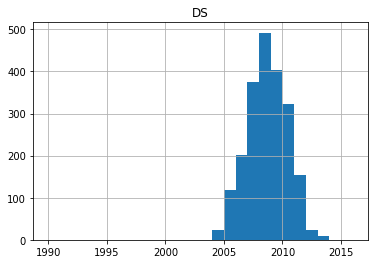

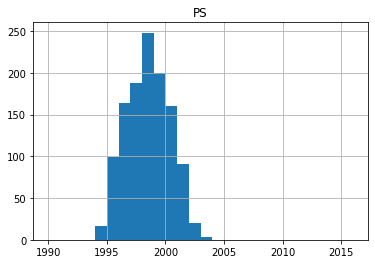

In [25]:
for platform in ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'):
    df_platform = df[df['platform'] == platform]
    df_platform['year_of_release'].hist(bins = 26, range = (1990, 2016))
    plt.title(platform)
    plt.show()

среднее время жизни платформ - 10 лет. Для дальнейшего анализа возьмем данные с 2007 по 2016 год. 

## Top платформ после 2007 года.

In [26]:
df = df[df['year_of_release'] >= 2012]

In [27]:
top_platform = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).reset_index()
top_platform

,platform,sum_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Топ сильно изменился, появилась и вышла на первое место платформа PS4, исчезла из топа PS2 пиковые продажи который были в период 2003-2007 годах.


In [28]:
top_platform = top_platform['platform'].head(5)
top_platform


0     PS4
1     PS3
2    X360
3     3DS
4    XOne
Name: platform, dtype: object

Определим, какие платформы растут, какие падают в данный период

In [29]:
df_top_platform = df[df['platform'].isin(top_platform)]


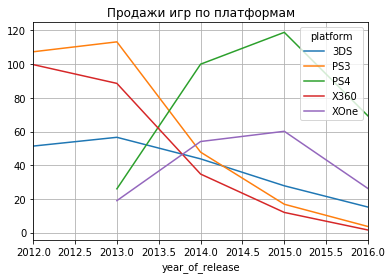

In [30]:
top_pivot = df_top_platform.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
top_pivot
top_pivot.plot(kind = 'line')
plt.title('Продажи игр по платформам')
plt.grid()

в 2016 году наблюдается спад продаж по новым косолям, из-за того что данные предоставлены не за весь год(сейчас декабрь 2016), предположительно, пиковые продажи игр приходятся на конец года в связи с праздниками. 

## Потенциально прибыльные платформы на 2017 это PS4 и XOne. 
После выхода PS4 и XOne, продажи всех остальных платформ резко упали и к 2016 году близяться к нулю. 
Но что если в топ платформ не попала новая перспективная платформа, проверим.

Text(0.5, 1.0, 'Продажи игр по платформам')

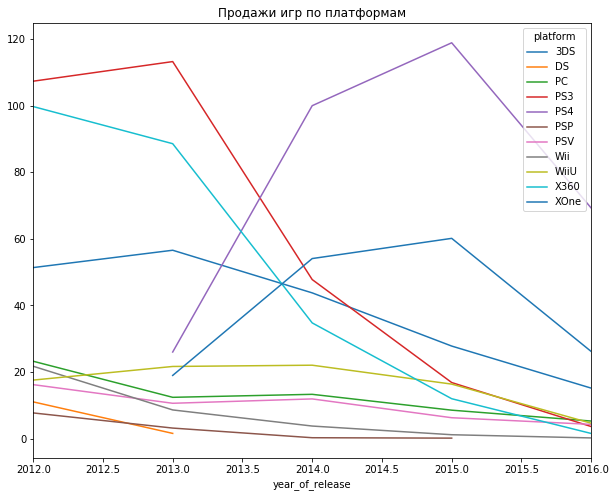

In [31]:
pivot = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

pivot.plot(kind = 'line', figsize = (10,8))
plt.title('Продажи игр по платформам')

Text(0.5, 1.0, 'Продажи игр по платформам')

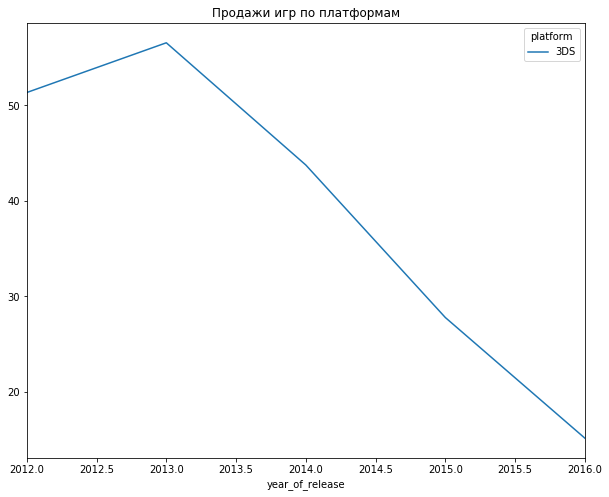

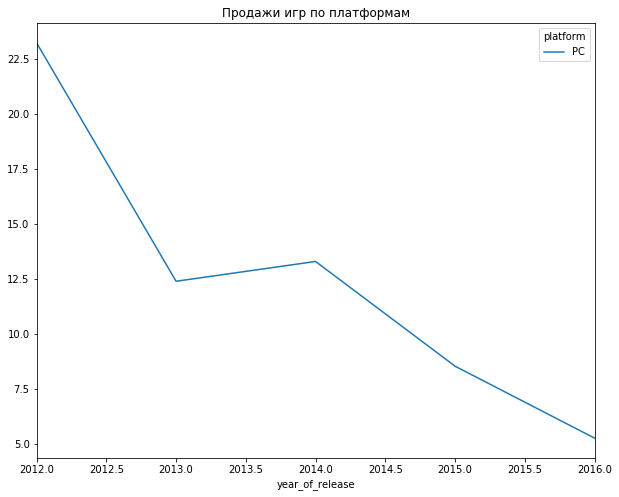

In [32]:
df4 = df[df['platform'] == '3DS']
pivot = df4.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

pivot.plot(kind = 'line', figsize = (10,8))
plt.title('Продажи игр по платформам')

df4 = df[df['platform'] == 'PC']
pivot = df4.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

pivot.plot(kind = 'line', figsize = (10,8))
plt.title('Продажи игр по платформам')

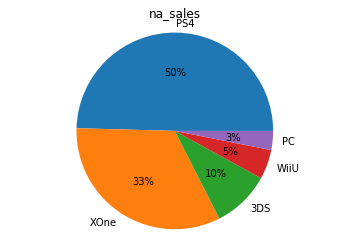

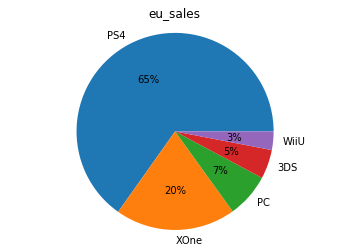

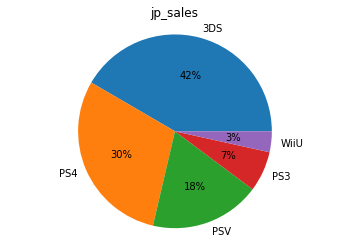

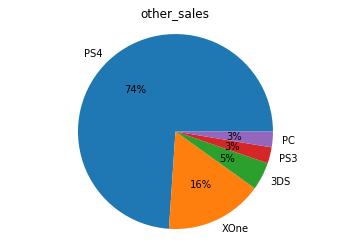

In [33]:
df5 = df[df['year_of_release'] == 2016]
regions = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
for region in regions:
    top_platf = df5.pivot_table(index = 'platform', values = region, aggfunc = 'sum')
    
    top_platf = top_platf[region] / top_platf[region].sum() *100
    top_platf = top_platf.sort_values( ascending=False).head(5).reset_index()
    labels = top_platf['platform']
    fig, ax = plt.subplots()
    ax.pie(top_platf[region], labels = labels, autopct='%1.0f%%')
    ax.set_title(region)
    ax.axis("equal")
    
    
    
    
  

Других новых платформ/перспективных платформ не обнаружено.

p.s. В таком изобилии линий сложно разобраться с цветом и соотнести линии с легендой, для этой цели пригодился бы интерактивный график на plotly, но мы их еще не проходили, самостоятельно в тренажере не получилось импортировать нужные библиотеки :)

(0, 10)

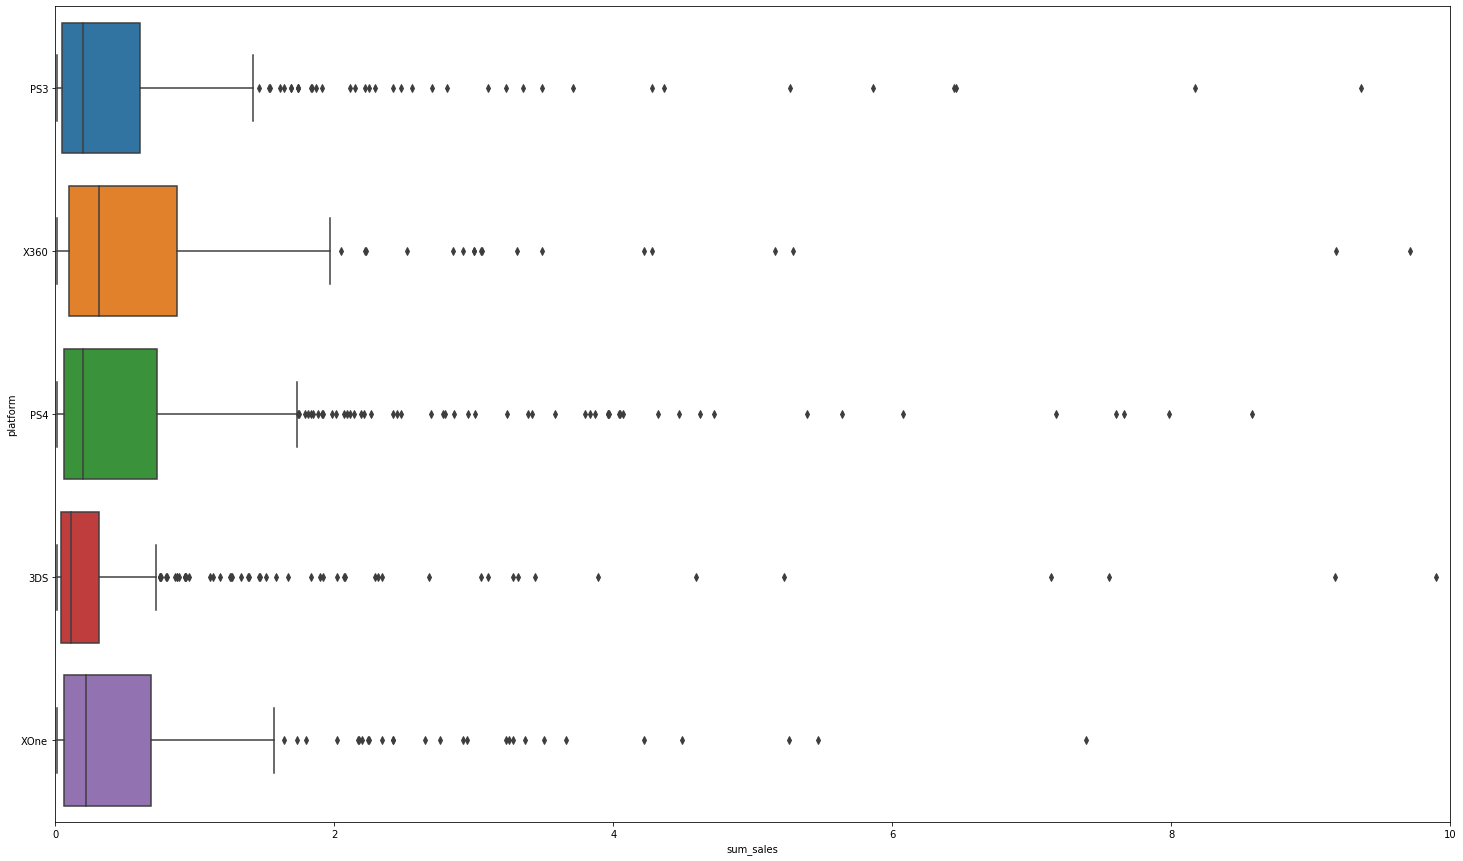

In [34]:
df6 = df.loc[df['platform'].isin(top_platform)]
plt.figure(figsize=(25,15))
sns.boxplot(y = 'platform', x = 'sum_sales', data = df6)
plt.xlim(0, 10)

Посмотрим на распределения продаж у популярных платформ

По всем консолям наблюдается много выбросов или редко встечающихся значений, которые сильно влияют на объем продажи и статистические данные в целом по консоли.Эти данные говорят о том, что у всех консолей есть топовые игры, продажи которых отличаются на порядки от медианного значения.

## Отзывы и продажи

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,n/a,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,n/a,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Коэффициент корреляции: 0.40656790206178095


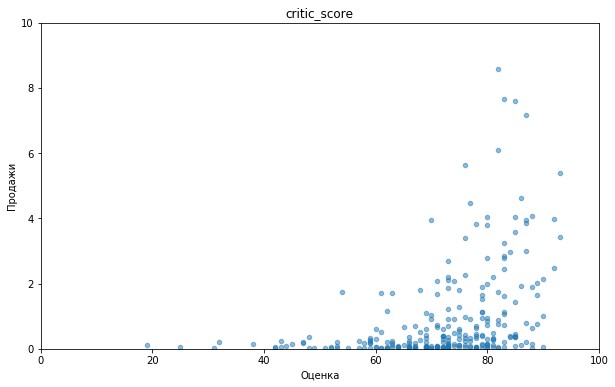

In [36]:
def score(score, platform):
    df1 = df[df['platform'] == platform]
    ax = df1.plot(kind='scatter', x=score, y='sum_sales', alpha=0.5, xlim=(0,100), ylim=(0,10), figsize = (10,6))
    ax.set_ylabel("Продажи")
    ax.set_xlabel("Оценка")
    ax.set_title(score)
    print('Коэффициент корреляции:', df1[score].corr(df1.loc[(df1[score] != -1) & (df1[score] != -2), 'sum_sales']))
score('critic_score', 'PS4')

Присутствует коррекляция между значениями,чем выше оценка критиков, тем выше продажи игр, это означает что помимо оценки критиков на продажи игр влияет еще множество факторов.

In [37]:
df['user_score'] = df['user_score'] * 10

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Коэффициент корреляции: 0.11721091254217708


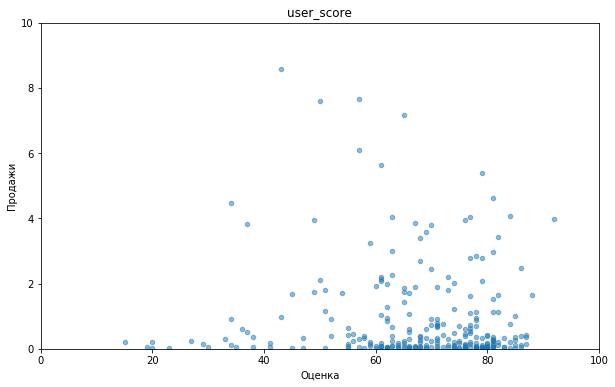

In [38]:
score('user_score', 'PS4')

Присутствует слабая коррекляция между значениями. Оценка пользователей не так сильно влияет на продажи как оценка критиков т.е. пользователи больше доверяют оценке критиков чем оценке других пользователей

Коэффициент корреляции: 0.4169983280084017


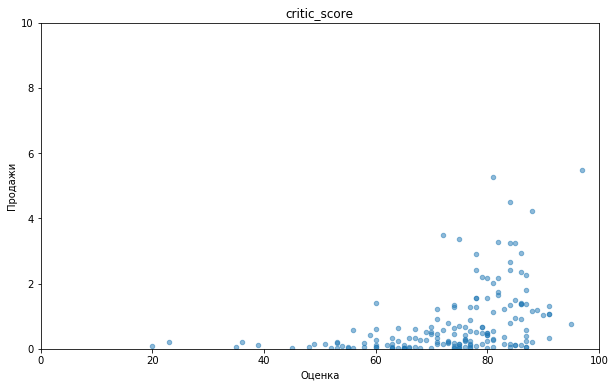

In [39]:
score('critic_score', 'XOne')

Коэффициент корреляции: 0.12629003108011327


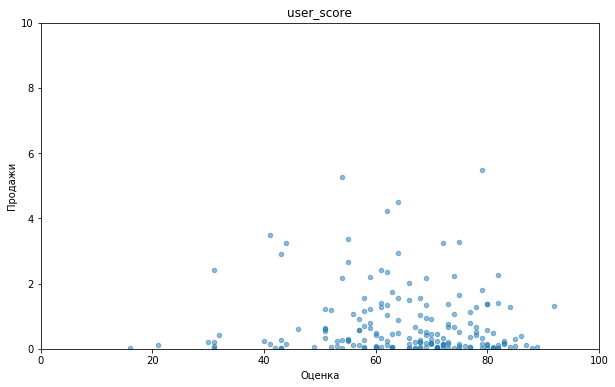

In [40]:
score('user_score', 'XOne')

По XOne корреляция оценки Критиков с продажами выше чем у PS4, и примерно такая же корреляция по оценке пользователей. Оценка пользователей не так сильно влияет на продажи как оценка критиков т.е. пользователи больше доверяют оценке критиков чем оценке других пользователей.

Сравнение с другими платформами

Коэффициент корреляции PS4 / user_score : 0.11721091254217708
Коэффициент корреляции PS4 / critic_score : 0.40656790206178095
Коэффициент корреляции XOne / user_score : 0.12629003108011327
Коэффициент корреляции XOne / critic_score : 0.4169983280084017
Коэффициент корреляции PS3 / user_score : 0.21870191293326557
Коэффициент корреляции PS3 / critic_score : 0.3314972592629587
Коэффициент корреляции X360 / user_score : 0.10488446701494007
Коэффициент корреляции X360 / critic_score : 0.3605734888507336
Коэффициент корреляции 3DS / user_score : 0.13191542309812432
Коэффициент корреляции 3DS / critic_score : 0.3208028695360785


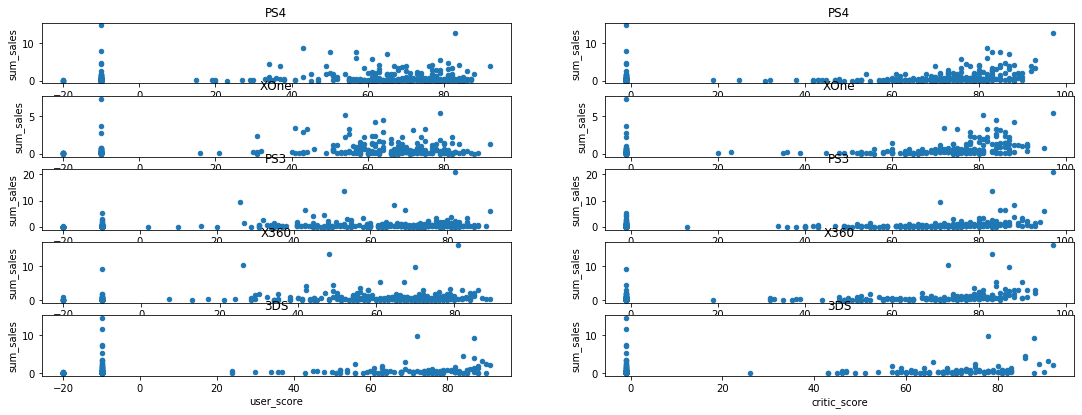

In [41]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(18.5, 6.5)
ax = ax.ravel()
platforms = ('PS4', 'XOne', 'PS3', 'X360', '3DS')
score_types = ('user_score', 'critic_score')
 
num_of_subplot = 0
 
for platform in platforms:
    for score_type in score_types:
        df[(df['platform'] == platform)]\
        .sort_values(by=score_type, ascending=True)\
        .plot(kind='scatter', 
              x = score_type, 
              y = 'sum_sales', 
              title= platform, 
              ax = ax[num_of_subplot])
        num_of_subplot += 1 
        print('Коэффициент корреляции', platform, '/', score_type,':',
              df.loc[df['platform']==platform, score_type]\
              .corr(df.loc[(df[score_type] != -1)\
              & (df[score_type] != -2),'sum_sales']))
    

В предшествующих платформах ситуация такая же как в перспективных, за исключением того, что кореляция с оценкой пользоватлей выше

## Распределение игр по жанрам. 

In [42]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-10.0,n/a,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-10.0,n/a,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


In [43]:
df_genre = df.groupby('genre')['sum_sales'].agg('sum').sort_values( ascending=False).reset_index()
df_genre

,genre,sum_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Самый продавайемый жарн игр - Action, наименее популярный - Strategy

(0, 5)

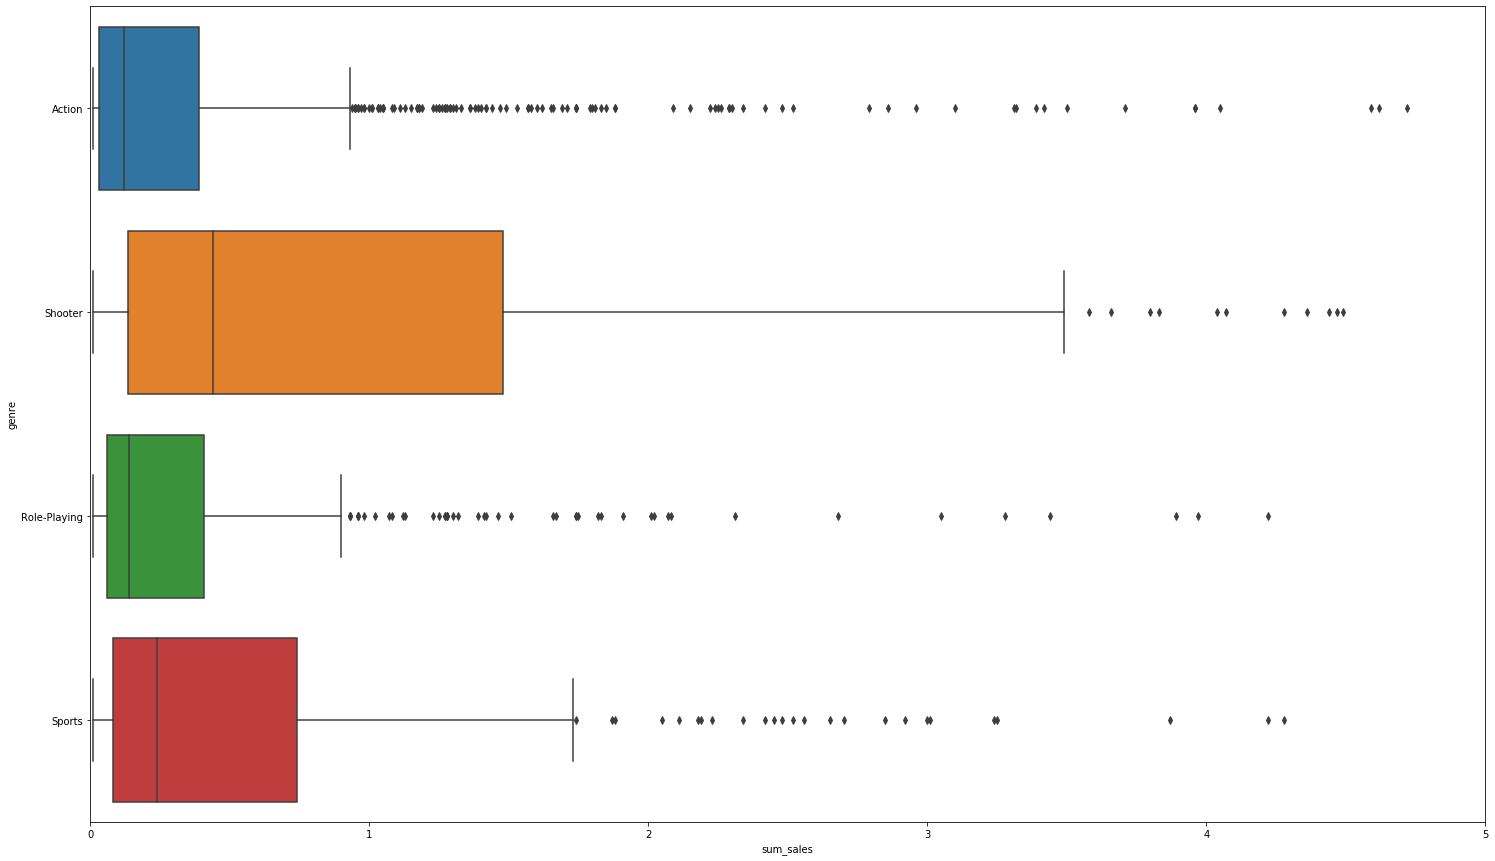

In [44]:
genres = df_genre['genre'].head(4)
df7 = df.loc[df['genre'].isin(genres)]
plt.figure(figsize=(25,15))
sns.boxplot(y = 'genre', x = 'sum_sales', data = df7)
plt.xlim(0, 5)

## портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-10.0,n/a,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-10.0,n/a,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


Топ 5 платформ в регионе na_sales доля в % :
   platform   na_sales
0     X360  23.698326
1      PS4  18.400257
2      PS3  17.493274
3     XOne  15.757145
4      3DS   9.359189
Топ 5 жанров в регионе na_sales :
           genre  na_sales
0        Action    177.84
1       Shooter    144.77
2        Sports     81.53
3  Role-Playing     64.00
4          Misc     38.19
Топ 5 платформ в регионе eu_sales доля в % :
   platform   eu_sales
0      PS4  27.838286
1      PS3  21.084409
2     X360  14.703445
3     XOne  10.179156
4      3DS   8.413243
Топ 5 жанров в регионе eu_sales :
           genre  eu_sales
0        Action    159.34
1       Shooter    113.47
2        Sports     69.09
3  Role-Playing     48.53
4        Racing     27.29
Топ 5 платформ в регионе jp_sales доля в % :
   platform   jp_sales
0      3DS  45.586250
1      PS3  18.324852
2      PSV  10.925330
3      PS4   8.287465
4     WiiU   6.755634
Топ 5 жанров в регионе jp_sales :
           genre  jp_sales
0  Role-Playing     65.

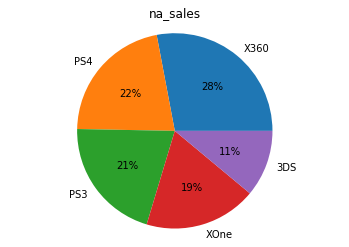

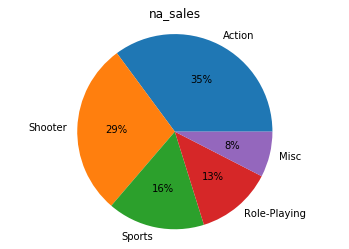

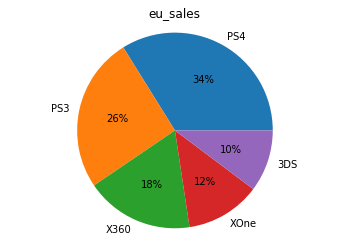

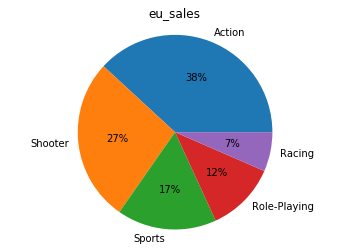

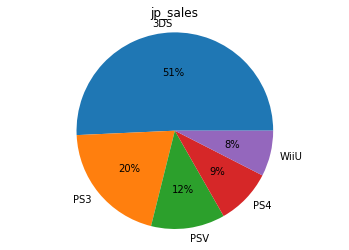

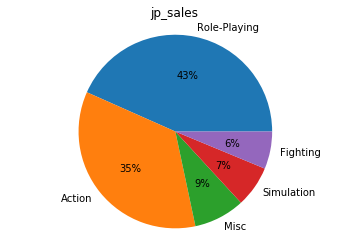

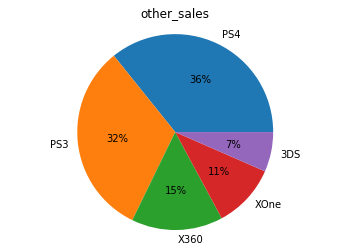

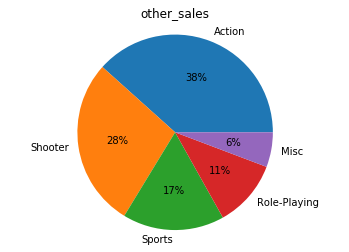

In [46]:
regions = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
for region in regions:
    top_platform = df.pivot_table(index = 'platform', values = region, aggfunc = 'sum')
    
    top_platform = top_platform[region] / top_platform[region].sum() *100
    top_platform = top_platform.sort_values( ascending=False).head(5).reset_index()
    labels = top_platform['platform']
    fig, ax = plt.subplots()
    ax.pie(top_platform[region], labels = labels, autopct='%1.0f%%')
    ax.set_title(region)
    ax.axis("equal")
    
    df_genre = df.groupby('genre')[region].agg('sum').sort_values( ascending=False).head(5).reset_index()
    #df_genre = df_genre['genre']
    labels = df_genre['genre']
    fig, ax = plt.subplots()
    ax.pie(df_genre[region], labels = labels, autopct='%1.0f%%')
    ax.set_title(region)
    ax.axis("equal")
    
    
    print("Топ 5 платформ в регионе", region, 'доля в % :''\n', top_platform)
    print("Топ 5 жанров в регионе", region, ':''\n' , df_genre)
    

Сильно отличается от других регион jp_sales, где самый популярный жанр Role-Playing, а самая популярная платформа 3DS.
По платформам семейство PlayStation занимает лидирующие позиции во всех регионах кроме  Северной Америке и Японии, в Америке больше предпочитают Xbox.
Что касается жанров игр, то предпочтения пользователей совпадает по всем регионам кроме Японии.

## Влияние рейтинга ESRB на продажи в отдельном регионе

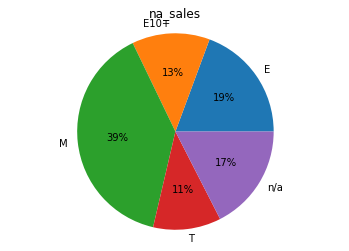

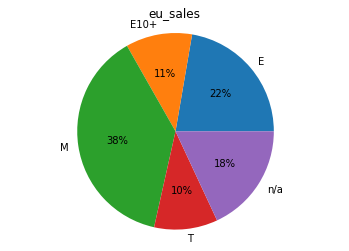

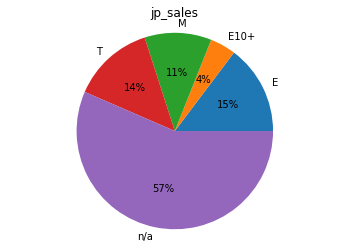

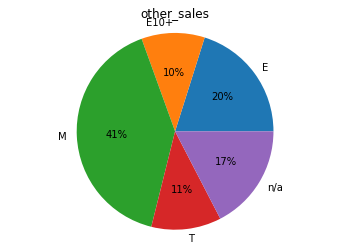

In [47]:
for region in regions:
    df2 = df.groupby('rating')[region].agg('sum').reset_index()
    labels = df2['rating']
    fig, ax = plt.subplots()
    ax.pie(df2[region], labels = labels, autopct='%1.0f%%')
    ax.set_title(region)
    ax.axis("equal")
    

Распределение продаж по рейтингу ESRB одинаковое во всех регионах, кроме Японии, но возможно это связано не столько с рейтингом, сколько с предпочтениями по жанрам.

##  Провека гипотез
Неоходимо сформировать нулевую гипотезу. H₀ всегда формулируется так, чтобы использовать знак равенства.
Для проверки гипотез, возьмем стандартное значение alpha = 0.05

   1. Сформулируем нулевую зипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны.
   альтренативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны
   


In [48]:
XOne = df.loc[(df['user_score'] != -1) & (df['user_score'] != -2)]\
.loc[df['platform'] == 'XOne', 'user_score']

PC = df.loc[(df['user_score'] != -1) & (df['user_score'] != -2)]\
.loc[df['platform'] == 'PC', 'user_score']

print('дисперсия XOne:', np.var(XOne, ddof=1))
print('дисперсия PC:', np.var(PC, ddof=1))

alpha = 0.05  

results = st.ttest_ind(XOne, PC, nan_policy='omit', equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

дисперсия XOne: 1295.5685132154965
дисперсия PC: 1058.1645140562248
p-значение:  0.05047964803720238
Не получилось отвергнуть нулевую гипотезу


Подтверждаем гипотезу : средние пользовательские рейтинги платформ Xbox One и PC равны


2. Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
   альтренативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [49]:
Action = df.loc[(df['user_score'] != -1) & (df['user_score'] != -2)]\
.loc[df['genre'] == 'Action', 'user_score']

Sports = df.loc[(df['user_score'] != -1) & (df['user_score'] != -2)]\
.loc[df['genre'] == 'Sports', 'user_score']
print('дисперсия Sports:', np.var(Sports, ddof=1))
print('дисперсия Action:', np.var(Action, ddof=1))

alpha = 0.05  

results = st.ttest_ind(Action, Sports, nan_policy='omit', equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

дисперсия Sports: 1122.2404131030244
дисперсия Action: 1669.1242511276635
p-значение:  0.0036609025158292536
Отвергаем нулевую гипотезу


Соответственно подтверждаем гипотезу альтернативную: средние пользовательские рейтинги жанров Action и Sports не равны.

# Вывод
При анализе данных были обнаружен существенные объемы пропусков в данных по отзывам критиков и пользователей которые были заменены на маркеры отсутвствия данных. Так же в исходных данных имеются пропуски по рейтингу ESRB, которые связаны с регионом на который распространяется действие данной организации, пропуски были заменены на маркер отсутствия данных.
После выхода PS4 и XOne, продажи всех остальных платформ резко упали и к 2016 году близяться к нулю. Самые перспективные платформы на 2017 год - PS4 и XOne, а самые прибыльные жанры это Shooter и Sports, самы популярный - Action, для всех регионов кроме Японии, где рынок сильно отличается от остальных регионов, как по платформам так и по жанрам игр.
Корреляционный анализ показал взаимосвязь между оценками критиков и объемом продаж, чем выше оценка, тем выше продажи.

Так же были подтверждены следующие гипотезы:
1. средние пользовательские рейтинги платформ Xbox One и PC равны
2. средние пользовательские рейтинги жанров Action и Sports не равны.

Потенциально популярным продуктом в 2017 году можно считать:
Игры на PS4 и XOne, имеющие высокий рейтинг критиков, самыми массовыми(продажи в ассоритименте) жанрами являются Shooter и Sports.
Для Японии: игры на платформе 3DS, самый популярный жанр Role-Playing.

 